--------------------------
#### Loss function
----------------

#### 2. Cross-Entropy / Log Loss


- __Log Loss__ and __Cross Entropy__ are almost the Same
- __Log loss__ is usually used when there are just 2 possible outcomes that can be either 0 or 1. 
- __Cross entropy__ is usually used when ther are 3 or more possible outcomes.

The cross entropy formula takes in 2 distributions, 
- 𝑝(𝑥), the __true__ distribution 
- 𝑞(𝑥), the __estimated__ distribution, 

defined over the discrete variable 𝑥 and is given by

$$ \Large H(p,q) = -\sum_{\forall x} p(x) \log(q(x)) $$

Suppose you are looking at a really weirdly shaped spinner that can come up “red”, “blue”, or “green”. 

|                                    | red          | blue        | green   |
|------------------------------------| --------     | -------     | ------- |
| Actual / True labels               |   0.3        |   0.2       |   0.5   |
| y_pred (probabilities)             |   0.1        |   0.5       |   0.4   |

We spin the spinner many thousands of times to determine the __true/actual__ probabilities : get (0.3, 0.2, 0.5) 

And the probabilities of a __prediction__ : (0.1, 0.5, 0.4). 

To measure the accuracy of the prediction we can use __cross entropy__ error/loss:

CE = -( (0.3)ln(0.1) + (0.2)ln(0.5) + (0.5)ln(0.4) )
   = -( (0.3)(-2.3)  + (0.2)(-0.69) + (0.5)(-0.91) )
   = -( -0.69        + -0.14        + -0.46 )
   = 1.29

> In words, __cross entropy__ is the negative sum of the products of the __logs of the predicted probabilities__ times the __actual probabilities__. 

#### In machine learning ... 
most often the predictions are discrete, so the actual labels are 0 or 1

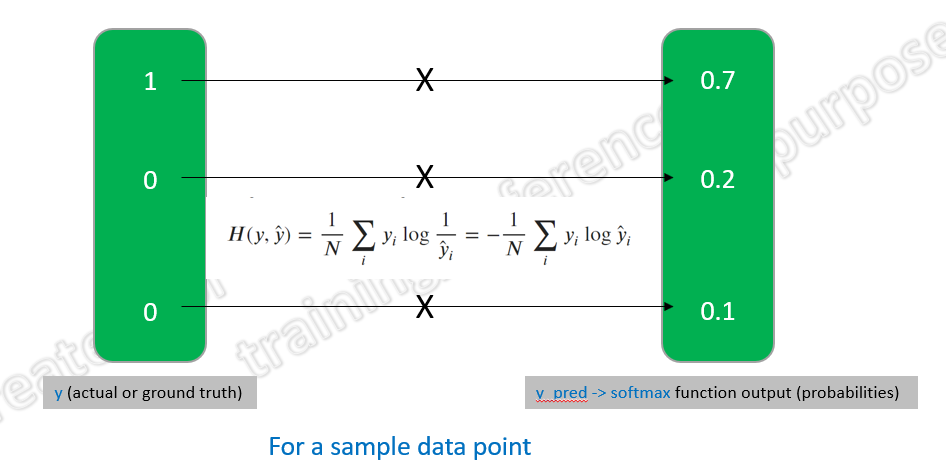

In [20]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\CE-loss.PNG', width=600)

For example, suppose we are trying to predict the political leaning (conservative, moderate, liberal) of a person based on their age, annual income, and so on. 

we encode (conservative, moderate, liberal) as [(1,0,0) (0,1,0) (0,0,1)]. 

Now suppose that for a particular age, income, etc. your prediction is (0.3, 0.6, 0.1) = moderate, because the middle value is largest.

|                                    | conservative | moderate | liberal |
|------------------------------------| --------     | -------  | ------- |
| Actual / True labels               |     0        |    1     |    0    |
| y_pred (probabilities)             |   0.3        |   0.60   |   0.1  |


Using cross entropy, the error is:

In [2]:
import numpy as np

In [3]:
y      = np.array([0,     1,  0])
y_pred = np.array([0.3,  .6, .1])

ce_loss = np.sum(-(y * np.log2(y_pred)))
ce_loss

0.7369655941662062

if our classifier is more confident and predicts probabilities as (0.05, 0.90, 0.05)

In [5]:
y_pred = np.array([0.05,  .9, .05])

ce_loss = np.sum(-(y*np.log2(y_pred)))
ce_loss

0.15200309344504995

> Smaller cross entropy values indicate a better prediction.

In machine learning terminologies, we will often see this equation __averaged__ over all examples as a __cost__ function. 
- usually a loss function is lower level and describes how a single instance or component determines an error value, 
- cost function is higher level and describes how a complete system is evaluated for optimisation. 

A __cost__ function based on multiclass log loss for data set of size N might look like this:

$$ \Large H(y, \hat{y}) = \frac{1}{N} \sum_i y_i \log \frac{1}{\hat{y}_i} = -\frac{1}{N} \sum_i y_i \log \hat{y}_i$$

#### 4. Binary cross entropy

In [2]:
import numpy as np

In [1]:
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-10  # small value to avoid division by zero
    
    # Clip predicted probabilities to avoid log(0) and log(1)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Calculate the loss
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    # Take the average over all samples
    average_loss = np.mean(loss)
    
    return average_loss

In [3]:
# Dummy data
y_true = np.array([1, 0, 1, 0])
y_pred = np.array([0.8, 0.2, 0.6, 0.3])

# Calculate Binary Cross-Entropy Loss
loss = binary_cross_entropy_loss(y_true, y_pred)
print("Binary Cross-Entropy Loss:", loss)

Binary Cross-Entropy Loss: 0.32844691758328565


**Another example**

In [8]:
X = np.array([-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6])
y = np.array([ 0,     0,    1,   0,   1,   1,   1,   1,   1,   1])

In [10]:
X1 = np.array([-2.2, -1.4,       0.2])
X2 = np.array([            -0.8,      0.4, 0.8, 1.2, 2.2, 2.9, 4.6])

y1 = np.array([0,       0,       0])
y2 = np.array([             0,        0,   0,    0,   0,   0,   0])

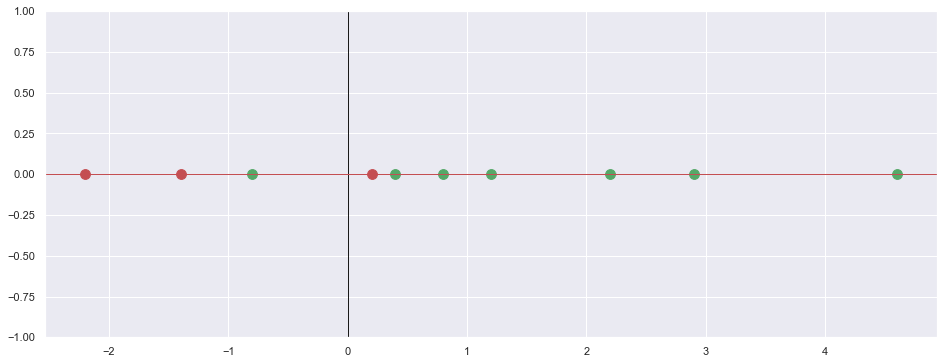

In [11]:
plt.figure(figsize=(16, 6))
plt.scatter(X1, y1, marker='o', s=96, c='r');
plt.scatter(X2, y2, marker='o', s=96, c='g');

plt.axvline(linewidth=1, color='k')
plt.axhline(linewidth=1, color='r')
plt.ylim((-1, 1));

So, our classification problem is quite straightforward: given our feature x, we need to predict its label: red or green.

Since this is a binary classification, we can also pose this problem as: “is the point green” or, even better, “what is the probability of the point being green”? 

Ideally, green points would have a probability of 1.0 (of being green), while red points would have a probability of 0.0 (of being green).

In this setting, green points belong to the positive class (YES, they are green), while red points belong to the negative class (NO, they are not green).

Let us fit a model to perform this classification, it will predict a probability of being green to each one of our points. 

Given what we know about the color of the points, how can we evaluate how good (or bad) are the predicted probabilities? 

This is the whole purpose of the ** loss function! **

It should return 
- high values for bad predictions and 
- low values for good predictions.

$$ \large
\operatorname{Cost}\left(h_{\theta}(x), y\right)=\left\{\begin{aligned}
-\log \left(h_{\theta}(x)\right) & \text { if } y=1 \\
-\log \left(1-h_{\theta}(x)\right) & \text { if } y=0
\end{aligned}\right.
                                                        $$

the loss function looks like:-
       
$$ \large J(\theta) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\left[y^{(i)}log(h_\theta(x^{(i)})) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))\right] $$

where y is the label (1 for green points and 0 for red points) and p(y) is the predicted probability of the point being green for all N points.

Reading this formula, it tells you that, for each green point (y=1), it adds log(p(y)) to the loss, that is, the log probability of it being green. Conversely, it adds log(1-p(y)), that is, the log probability of it being red, for each red point (y=0).

#### Small example

In [17]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [18]:
def cross_entropy_loss(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

In [19]:
z = np.arange(-10, 10, 0.1)

In [20]:
h_z = sigmoid(z)

In [22]:
# Value of cost function when y = 1
# -log(h(x))

cost_1 = cross_entropy_loss(h_z, 1)

In [23]:
# Value of cost function when y = 0
# -log(1 - h(x))
#
cost_0 = cross_entropy_loss(h_z, 0)

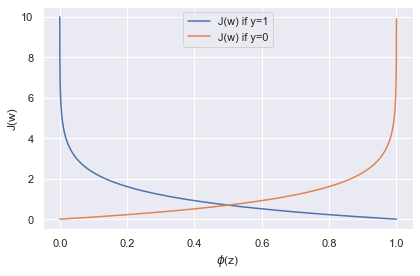

In [24]:
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()

For y = 1, if predicted probability is near 1, loss function out, J(W), is close to 0 otherwise it is close to infinity.

For y = 0, if predicted probability is near 0, loss function out, J(W), is close to 0 otherwise it is close to infinity.


#### Computing the Loss — the visual way

let’s train a Logistic Regression to classify our points. The fitted regression is a sigmoid curve representing the probability of a point being green for any given x . 

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')

m = len(X)
X = X.reshape((m, 1))

logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
logreg.predict_proba(X)

array([[0.81497245, 0.18502755],
       [0.66932085, 0.33067915],
       [0.53045326, 0.46954674],
       [0.29944246, 0.70055754],
       [0.26031386, 0.73968614],
       [0.19261532, 0.80738468],
       [0.13920934, 0.86079066],
       [0.05766064, 0.94233936],
       [0.03005724, 0.96994276],
       [0.00590288, 0.99409712]])

In [82]:
y_pred = logreg.predict(X)
np.c_[y, y_pred]

array([[0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [66]:
# store the predicted probabilites of class 1
y_pred_proba = logreg.predict_proba(X)[:, 1]

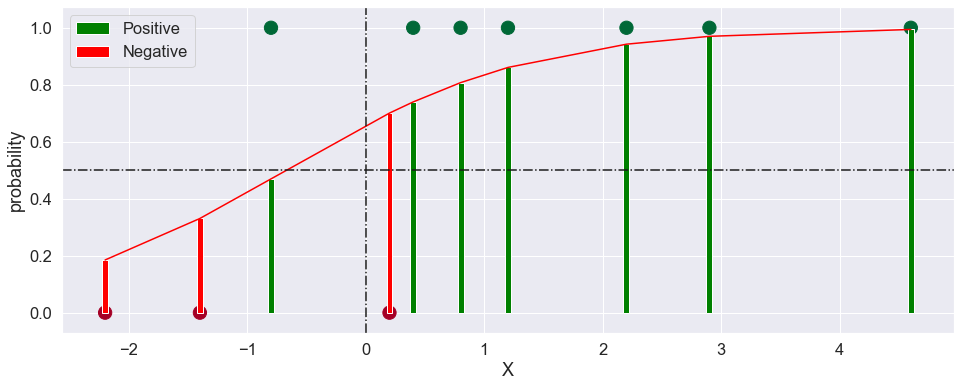

In [88]:
# plot the predicted probabilities
plt.figure(figsize=(16, 6))

plt.scatter(X, y, c=y, cmap='RdYlGn', s=176)

plt.plot(X, y_pred_proba, color='red')

plt.bar(X.ravel()[y==1],   y_pred_proba[y ==1], color='green', width=0.05, label='Positive')
plt.bar(X.ravel()[y==0],   y_pred_proba[y ==0], color='red',   width=0.05, label='Negative')

plt.axhline(y=0.5, color='k', linestyle='-.')
plt.axvline(x=0,   color='k', linestyle='-.')

plt.xlabel('X')
plt.ylabel('probability');
plt.legend();

Since we’re trying to compute a loss, we need to penalize bad predictions.

- If the probability associated with the __true class__ is 1.0, we need its loss to be 0. 

- Conversely, if that probability is low, say, 0.01, we need its loss to be HUGE!

Let’s take the (negative) log of the probabilities — these are the corresponding losses of each and every point.

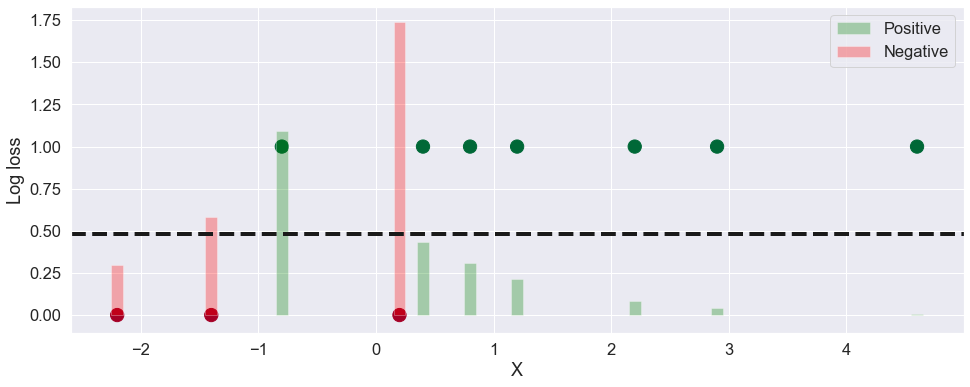

In [91]:
# plot the predicted probabilities
plt.figure(figsize=(16, 6))

plt.scatter(X, y, c=y, cmap='RdYlGn', s=176)

#plt.plot(X, y_pred_proba, color='red')

plt.bar(X.ravel()[y==1], -np.log2(  y_pred_proba[y ==1]), color='green', width=0.1, label='Positive', alpha=.3)
plt.bar(X.ravel()[y==0], -np.log2(1-y_pred_proba[y ==0]), color='red',   width=0.1, label='Negative', alpha=.3)

mean_loss = np.hstack((-np.log2(y_pred_proba[y ==1]), -np.log2(1-y_pred_proba[y ==0]))).mean()

plt.axhline(y=mean_loss, linestyle='--', linewidth= 4, color='k')
# plt.axvline(x=0,   color='c')

plt.xlabel('X')
plt.ylabel('Log loss');
plt.legend();

In [92]:
np.hstack((-np.log2(y_pred_proba[y ==1]), -np.log2(1-y_pred_proba[y ==0]))).mean()

0.4802919154993065

We have successfully computed the binary ** cross-entropy / log loss ** of this toy example. It is 0.4802919154993065!

# Loss function for logistic regression

- Logarithmic Loss, or simply Log Loss, is a classification loss function often used as an evaluation metric
- minimising the Log Loss is the goal
- In order to calculate Log Loss the classifier must assign a probability to each class rather than simply yielding the most likely class. Mathematically Log Loss is defined as

$$ \Large - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log \, p_{ij} $$

where 

    - N is the number of samples or instances, 
    - M is the number of possible labels 
    - $y_{ij}$ is a binary indicator of whether or not label j is the correct classification for instance i, 
    - and $p_{ij}$ is the model probability of assigning label j to instance i. 
    
A perfect classifier would have a Log Loss of precisely zero. 

Less ideal classifiers have progressively larger values of Log Loss. If there are only two classes then the expression above simplifies to

$$ \Large - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})] $$

OR

$$ \Large \text{Log Loss} = \sum_{(x,y)\in D} -y\log(y') - (1 - y)\log(1 - y') $$

 - y is the label. Since this is logistic regression, every value of y must either be 0 or 1.
 - $y^\prime$ is the predicted value (somewhere between 0 and 1), given the set of features.
 
Also written as ...

$$ \Large L(\theta) = \sum_i[ y_i\ln (1+e^{-\hat{y}_i}) + (1-y_i)\ln (1+e^{\hat{y}_i})] $$
 
## The equation for Log Loss is closely related to Shannon's Entropy measure from Information Theory

## Cross Entropy
The cross entropy formula takes in 2 distributions, 

- p(x), the true distribution, and 
- q(x), the estimated distribution, 

defined over the discrete variable x and is given by

$$ \Large H(p,q) = -\sum_{\forall x} p(x) \log(q(x)) $$

For a neural network, the calculation is independent of the following:

- What kind of layer was used.

- What kind of activation was used - although many activations will not be compatible with the calculation because their outputs are not interpretable as probabilities (i.e., their outputs are negative, greater than 1, or do not sum to 1). __Softmax__ is often used for multiclass classification because it guarantees a well-behaved probability distribution function.

For a neural network, you will usually see the equation written in a form where $y$ is the ground truth vector and $\hat{y}$ (or some other value taken direct from the last layer output) is the estimate. 

For a single example, it would look like this:

$$ \Large L = - \mathbf{y} \cdot \log(\mathbf{\hat{y}}) $$

Your example ground truth $y$ gives all probability to the first value, and the other values are zero, so we can ignore them, and just use the matching term from your estimates $\hat{y}$

$$ L = -(1\times log(0.1) + 0 \times \log(0.5) + ...) $$
$$ L = - log(0.1) \approx 2.303 $$

In [13]:
np.log(0.1)

-2.3025850929940455

In [14]:
np.log(0.3)

-1.2039728043259361

In [11]:
x = np.linspace(.01, 1, 2000)

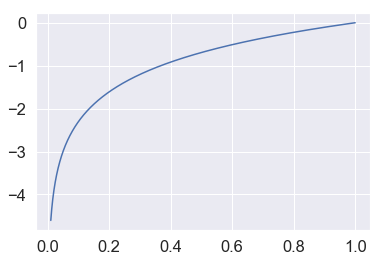

In [12]:
plt.plot(x, np.log(x));

That means, the loss would be same no matter if the predictions are [0.1,0.5,0.1,0.1,0.2] or [0.1,0.6,0.1,0.1,0.1]?

Yes, this is a key feature of multiclass logloss, it rewards/penalises probabilities of correct classes only. The value is independent of how the remaining probability is split between incorrect classes.

Cost function thus is

$$ \Large J = - \frac{1}{N}\left(\sum_{i=1}^{N} \mathbf{y_i} \cdot \log(\mathbf{\hat{y}_i})\right) $$

- named for the two authors of the method __Solomon Kullback__ and __Richard Leibler__, and is sometimes referred to as “relative entropy.”

- quantifies how much one probability distribution differs from another probability distribution.

- Classically, in Bayesian theory, there is some true distribution $P(X)$; we'd like to estimate with an approximate distribution $Q(X)$. 

- In this context, the KL divergence measures the __distance__ from the approximate distribution Q to the true distribution P.

- Mathematically, consider two probability distributions $P,Q$ on some space $ \mathcal{X}$. The __Kullback-Leibler divergence__ from $Q$ to $P$ (written as $D_{KL}(P \| Q)$ ))

- __KL divergence__ can be calculated as 

    - the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.
    
    
$$\begin{equation}
\large D_{KL}(P \| Q) = \sum p(X) \log \frac {p(X)} {q(X)} 
\end{equation}$$
    
$$\begin{equation}
\large D_{KL}(P \| Q) = \sum p(X) \log [ p(X) \div q(X) ]
\end{equation}$$